In [2]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
DTE = pd.read_csv("DTE.csv")
IR = pd.read_csv("IR.csv")
VTRS = pd.read_csv("VTRS.csv")
WMT = pd.read_csv("WMT.csv")

print(VTRS)

            Date    Open    High     Low   Close    Volume  Dividends  \
0     2021-01-04  15.430  15.521  15.058  15.331  12215600        0.0   
1     2021-01-05  15.289  15.389  14.727  14.967  12217800        0.0   
2     2021-01-06  15.025  15.446  14.967  15.289   8625100        0.0   
3     2021-01-07  15.314  15.455  15.182  15.314   7195100        0.0   
4     2021-01-08  15.231  15.380  14.909  15.132   6893300        0.0   
...          ...     ...     ...     ...     ...       ...        ...   
999   2024-12-23  11.937  12.043  11.716  12.024   8585200        0.0   
1000  2024-12-24  11.783  11.947  11.668  11.937   4059600        0.0   
1001  2024-12-26  11.928  12.149  11.889  12.091   6194700        0.0   
1002  2024-12-27  12.024  12.207  11.928  12.014   5182600        0.0   
1003  2024-12-30  11.957  12.014  11.822  11.918   5822900        0.0   

      Stock Splits  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [55]:
DTE["Ticker"] = "DTE"
IR["Ticker"] = "IR"
VTRS["Ticker"] = "VTRS"
WMT["Ticker"] = "WMT"

In [66]:
all_companies = pd.concat([DTE, IR, VTRS, WMT], ignore_index=True)
#assuring datetime for merged data
all_companies["Date"] = pd.to_datetime(all_companies["Date"])

#assuring datetiem for separate data
companies = {
    "DTE": DTE,
    "IR": IR,
    "VTRS": VTRS,
    "WMT": WMT
}

for name, company in companies.items():
    company["Date"] =pd.to_datetime(company["Date"])


In [72]:
#Problem 1

print(sum(DTE["High"] == DTE["Low"]))
print(sum(IR["High"] == IR["Low"]))
print(sum(VTRS["High"] == VTRS["Low"]))
print(sum(WMT["High"] == WMT["Low"]))

#No there is not a single day in all of these companies where High equals Low. If there would be a day where Low = High it would mean that the....
#...amount of shares bought equals amount of shares sold therefore it reaches the same price at some point.

0
0
0
0


In [58]:
#Problem 2

all_companies.groupby("Ticker").agg(
    Highest_Price=("High", "max"),
    Lowest_Price=("Low", "min")
)

,Highest_Price,Lowest_Price
Ticker,,
DTE,127.369,84.133
IR,105.952,39.144
VTRS,15.521,7.343
WMT,95.251,37.458


In [59]:
#Problem 3

DTE['Log Return'] = np.log(DTE['Close']/DTE['Close'].shift(1))
IR['Log Return'] = np.log(IR['Close']/IR['Close'].shift(1))
VTRS['Log Return'] = np.log(VTRS['Close']/VTRS['Close'].shift(1))
WMT['Log Return'] = np.log(WMT['Close']/WMT['Close'].shift(1))

print(DTE.agg({"Log Return" : ["min", "max", "mean", "std", "skew"]}))
print(IR.agg({"Log Return" : ["min", "max", "mean", "std", "skew"]}))
print(VTRS.agg({"Log Return" : ["min", "max", "mean", "std", "skew"]}))
print(WMT.agg({"Log Return" : ["min", "max", "mean", "std", "skew"]}))

      Log Return
min    -0.047619
max     0.042158
mean    0.000301
std     0.012131
skew   -0.229256
      Log Return
min    -0.095773
max     0.065053
mean    0.000716
std     0.017967
skew   -0.326673
      Log Return
min    -0.278109
max     0.126771
mean   -0.000251
std     0.021188
skew   -2.182969
      Log Return
min    -0.120779
max     0.067534
mean    0.000674
std     0.012508
skew   -1.390959


In [67]:
#Problem 4
for name, company in companies.items():
    second_highest = company["Log Return"].nlargest(2).index[1]
    second_lowest = company["Log Return"].nsmallest(2).index[1]

    print(name)
    print("Second highest gain at day number:", second_highest)
    print("Second highest loss at day number:", second_lowest)
    print()
    

DTE
Second highest gain at day number: 721
Second highest loss at day number: 363

IR
Second highest gain at day number: 713
Second highest loss at day number: 294

VTRS
Second highest gain at day number: 465
Second highest loss at day number: 33

WMT
Second highest gain at day number: 909
Second highest loss at day number: 723



In [70]:
#Problem 5

for name, company in companies.items():
    company = company.set_index("Date")
    weekly_volume = company["Volume"].resample("W").sum()
    median_weekly_volume = weekly_volume.median()
    print(name, "median weekly volume:", median_weekly_volume)


DTE median weekly volume: 5294400.0
IR median weekly volume: 11576800.0
VTRS median weekly volume: 43080800.0
WMT median weekly volume: 89955300.0


In [77]:
#Problem 6

for name, company in companies.items():
    total_return = company["Close"].iloc[-1]/ company["Close"].iloc[0]-1
    print(f"{name} total return: {total_return:%}")
    
#The company with the highest return is IR at approximately 105% for this period.


DTE total return: 35.301084%
IR total return: 105.129717%
VTRS total return: -22.262083%
WMT total return: 96.584150%


In [80]:
#Problem 7

all_companies['volume_class'] = pd.qcut(all_companies['Volume'], q=3, labels=['Low', 'Medium', 'High'])
print(all_companies)

           Date    Open    High     Low   Close    Volume  Dividends  \
0    2021-01-04  88.659  88.812  86.619  86.969    986765        0.0   
1    2021-01-05  87.289  87.748  86.204  87.107    958918        0.0   
2    2021-01-06  88.156  89.016  87.632  88.666    752588        0.0   
3    2021-01-07  88.804  88.979  86.422  86.510   1268530        0.0   
4    2021-01-08  86.524  86.859  85.279  86.095   1011558        0.0   
...         ...     ...     ...     ...     ...       ...        ...   
4011 2024-12-23  90.817  90.817  88.247  89.676  26205400        0.0   
4012 2024-12-24  89.696  91.988  89.676  91.988   8992400        0.0   
4013 2024-12-26  91.849  92.187  91.482  92.098  10994000        0.0   
4014 2024-12-27  91.443  91.661  90.351  90.976  11384400        0.0   
4015 2024-12-30  90.053  90.390  89.457  89.894   9790200        0.0   

      Stock Splits Ticker  Log Return volume_class  
0              0.0    DTE         NaN          Low  
1              0.0    DTE    

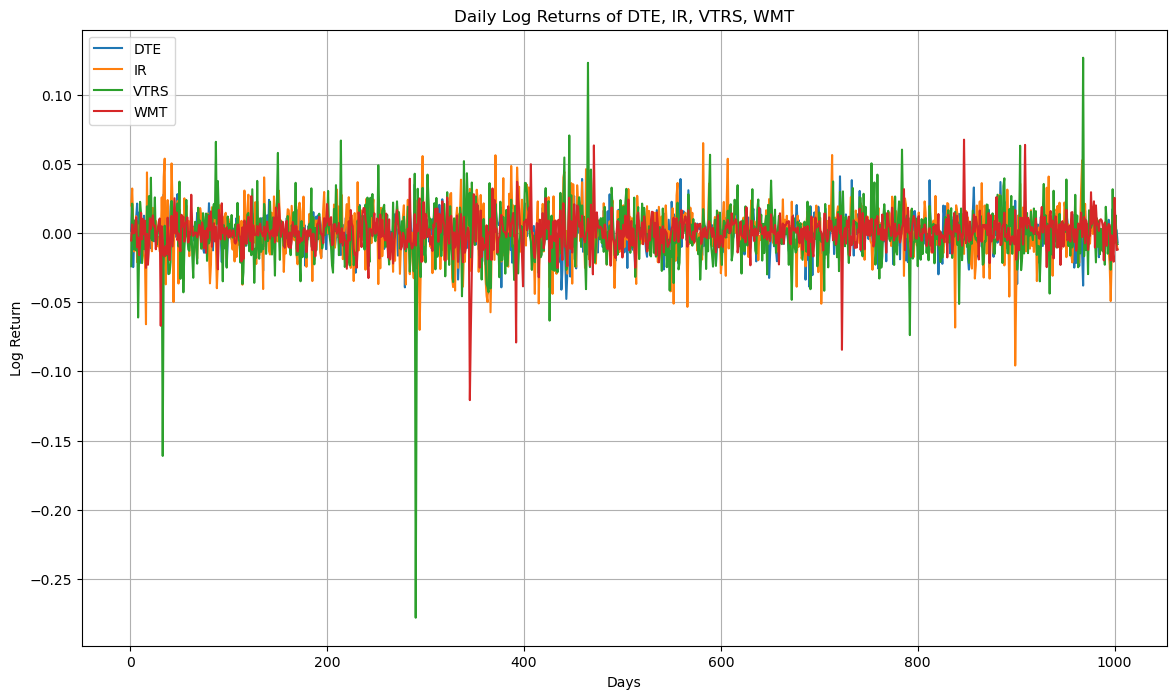

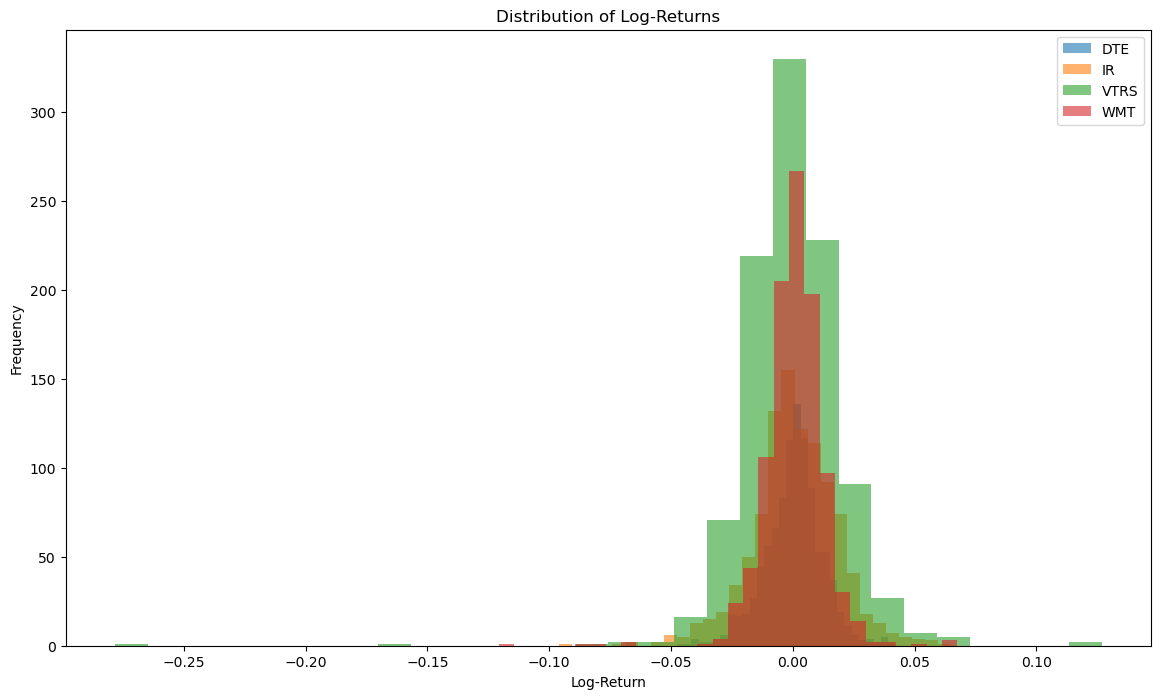

In [95]:
#Problem 8
#A

plt.figure(figsize=(14, 8))

for name, company in companies.items():
    plt.plot(company["Log Return"], label=name, linewidth=1.5)
plt.title("Daily Log Returns of DTE, IR, VTRS, WMT")
plt.xlabel("Days")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()

#B

plt.figure(figsize=(14, 8))

for name, company in companies.items():
    plt.hist(company["Log Return"], bins=30, alpha=0.6, label=name)
plt.title("Distribution of Log-Returns")
plt.xlabel("Log-Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [104]:
#PART 2

#Problem 1

spdata = pd.read_csv("companies_no_subindustry.csv")
print(f"The number of companies that have missing inclusion date is {spdata["included"].isna().sum()}")
print(spdata)

The number of companies that have missing inclusion date is 45
    Symbol              Security             GICS_Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                          hq    included      Founded  
0      Saint Paul, Minnesota  09.08.1976         1902  
1       Milwaukee, Wisconsin  26.07.2017         1916  
2    North Chicago, Illinois  31.03.1964        

In [116]:
#Problem 2

spdata["included"] = pd.to_datetime(
    spdata["included"],
    dayfirst = True,
    errors = "coerce"
)

spclean = spdata.dropna(subset=["included"]).copy()

#There are weird data in Founded, therefore I will choose the most left number always
spclean["Founded"] = spclean["Founded"].astype(str).str.extract(r"(\d{4})").astype(int)
spclean["Age"] = spclean["included"].dt.year - spclean["Founded"]
spclean = spclean[spclean["Age"] >= 0]


oldest_company = spclean.loc[spclean["Age"].idxmax()]
youngest_company = spclean.loc[spclean["Age"].idxmin()]

print("Oldest constituent:\n", oldest_company[["Symbol", "Security", "Age"]])
print("\nYoungest constituent:\n", youngest_company[["Symbol", "Security", "Age"]])

average_age = spclean["Age"].median()
print(f"\nAverage age of a constituent: {average_age} years")

Oldest constituent:
 Symbol              BK
Security    BNY Mellon
Age                211
Name: 71, dtype: object

Youngest constituent:
 Symbol       AMCR
Security    Amcor
Age             0
Name: 27, dtype: object

Average age of a constituent: 38.0 years


In [119]:
!git add Midterm.ipynb